# Feature Selection

This notebook is used purely for feature selection. 

### Code below is for the optimal number of amenities & features
#### Amenities: 80
#### Num Features: 89
#### Model: LGBM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from preprocessing import preprocess_df, get_amenities

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('data/listings.csv.gz')
# data = pd.read_csv('LA_listings_detailed.csv')
df = preprocess_df(data = data, verbose = True)

Columns dropped ['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_about', 'host_picture_url', 'calendar_last_scraped', 'license', 'host_url', 'host_thumbnail_url', 'host_verifications', 'name', 'description', 'neighborhood_overview', 'host_name', 'calendar_updated', 'bathrooms', 'host_neighbourhood', 'neighbourhood', 'host_listings_count', 'beds', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'neighbourhood_cleansed']
Before removing inactive listings, length = 33329
After removing inactive listings, length = 21643
After removing price = 0 listings, length = 21630
Features bathroom_num and bathroom_sharing extracted.
Int and float mv filled with 0, object m

In [ ]:
df = get_amenities(data = df, 
                   num_amenities =80, # get top amenities (can get more)
                  verbose = True)

[('wifi', 21134), ('smoke alarm', 20745), ('essentials', 20280), ('hangers', 19083), ('long term stays allowed', 19005), ('carbon monoxide alarm', 18914), ('hair dryer', 18323), ('heating', 18151), ('kitchen', 18115), ('hot water', 17506), ('iron', 17466), ('shampoo', 17024), ('air conditioning', 16272), ('dishes and silverware', 15514), ('dedicated workspace', 15397), ('microwave', 14931), ('refrigerator', 14831), ('cooking basics', 14729), ('coffee maker', 14654), ('washer', 14262), ('dryer', 13825), ('free street parking', 13667), ('free parking on premises', 13474), ('fire extinguisher', 13400), ('bed linens', 12745), ('tv', 11892), ('private entrance', 11777), ('stove', 11430), ('oven', 11082), ('first aid kit', 11043), ('extra pillows and blankets', 9735), ('dishwasher', 8471), ('security cameras on property', 6917), ('backyard', 6522), ('patio or balcony', 6375), ('luggage dropoff allowed', 6005), ('bathtub', 5971), ('cable tv', 5651), ('shower gel', 5298), ('tv with standard ca

In [ ]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude',
       ...
       'amenities_smart lock', 'amenities_beach essentials',
       'amenities_mini fridge', 'amenities_breakfast',
       'amenities_cleaning before checkout', 'amenities_clothing storage',
       'amenities_private fenced garden or backyard',
       'amenities_keurig coffee machine', 'amenities_central heating',
       'amenities_high chair'],
      dtype='object', length=121)

In [ ]:
df.head()

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,...,amenities_smart lock,amenities_beach essentials,amenities_mini fridge,amenities_breakfast,amenities_cleaning before checkout,amenities_clothing storage,amenities_private fenced garden or backyard,amenities_keurig coffee machine,amenities_central heating,amenities_high chair
2,2732,3041,2019-12-27,1,2.0,1,1,Other Cities,34.00440,-118.48095,...,0,0,0,0,0,0,0,0,0,0
4,3021,3415,2018-10-31,0,6.0,1,1,City of Los Angeles,34.11160,-118.38223,...,0,0,0,0,0,0,0,0,0,0
7,5843,9171,2020-08-22,1,8.0,1,1,City of Los Angeles,33.98750,-118.43200,...,0,0,0,0,0,0,0,0,0,1
8,6033,11619,2020-03-22,0,14.0,1,1,City of Los Angeles,34.16887,-118.64478,...,0,0,0,0,1,0,0,0,0,1
11,9140,28350,2019-11-25,0,1.0,1,1,Other Cities,33.77202,-118.18852,...,0,1,0,0,0,0,0,0,0,0


In [ ]:

df_tem = df.select_dtypes(include=['object'])
df_tem

,neighbourhood_group_cleansed,property_type,room_type,bathroom_sharing
2,Other Cities,Private room in rental unit,Private room,private
4,City of Los Angeles,Entire guest suite,Entire home/apt,0
7,City of Los Angeles,Entire residential home,Entire home/apt,0
8,City of Los Angeles,Entire bungalow,Entire home/apt,0
11,Other Cities,Private room in loft,Private room,shared
...,...,...,...,...
33159,Unincorporated Areas,Entire rental unit,Entire home/apt,0
33163,Other Cities,Private room in residential home,Private room,private
33207,Other Cities,Private room in residential home,Private room,shared
33279,Unincorporated Areas,Private room in residential home,Private room,shared


# Feature Engineering

### 1. host_duration

In [ ]:
# Last scraped date = 2021-12-07 (7th Dec)
df['host_duration'] = (pd.to_datetime('2021-12-10') - df['host_since']).dt.days

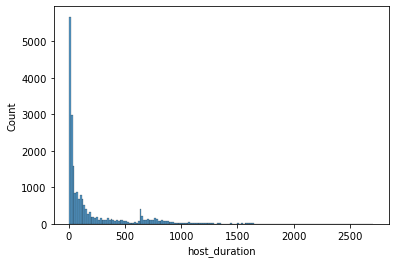

In [ ]:
sns.histplot(df['host_duration'])
plt.show()

### 2. managed_property

- Binary (0,1). 1 if properties managed by host id exceed the 95th percentile.

Note to self: wrap in function

In [ ]:
# Understand how many properties are potentially property managed

percentiles=[0.80,0.85,0.90,0.95]
percentile_rooms=[]
room_above=[]

for p in percentiles:
   percentile_rooms.append(df.host_id.value_counts().quantile(p))

print('Understand managed property percentiles beyond P75\n')
print(pd.DataFrame({'percentile':percentiles,'rooms_threshold':percentile_rooms}))

property_count=pd.DataFrame(df.groupby(['host_id'])['host_id'].count())
property_count.columns=['properties']
print('*****EXTRACT PROPERTIES MANAGED BY HOST ID *****')
property_count

Understand managed property percentiles beyond P75

   percentile  rooms_threshold
0        0.80              2.0
1        0.85              2.0
2        0.90              3.0
3        0.95              4.0
*****EXTRACT PROPERTIES MANAGED BY HOST ID *****


,properties
host_id,
3008,2
3041,2
3144,1
3415,3
6829,2
...,...
432956623,1
432962791,1
433063685,1


In [ ]:
property_count['prop_managed']=property_count['properties'].map(lambda x: 1 if x>=percentile_rooms[3] else 0)
df=pd.merge(df,property_count,on='host_id',how='inner')
df.prop_managed.value_counts()

0    14191
1     7434
Name: prop_managed, dtype: int64

### 3. utilization rate / occupancy rate over time periods

- short term proxy: avail30
- mid term proxy: avail60-90
- long term proxy: avail365

In [ ]:
cols=['availability_30','availability_60', 'availability_90','availability_365']
df[cols].describe()

,availability_30,availability_60,availability_90,availability_365
count,21625.000000,21625.000000,21625.000000,21625.000000
mean,10.423491,27.068671,46.045595,182.633110
std,10.750022,21.567259,32.250705,131.969759
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,12.000000,62.000000
50%,6.000000,28.000000,52.000000,169.000000
75%,19.000000,46.000000,75.000000,324.000000
max,30.000000,60.000000,90.000000,365.000000


In [ ]:
df['occ%_30D']=1-round(df.availability_30/30,2)
df['occ%_6090D']=((1-round(df.availability_60/60,2))+(1-round(df.availability_90/90,2)))/2
df['avail365%']=1-round(df.availability_365/365,2)

df=df.drop(cols,axis=1)

In [ ]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude',
       ...
       'amenities_private fenced garden or backyard',
       'amenities_keurig coffee machine', 'amenities_central heating',
       'amenities_high chair', 'host_duration', 'properties', 'prop_managed',
       'occ%_30D', 'occ%_6090D', 'avail365%'],
      dtype='object', length=123)

### 4. Location FE

In [ ]:
import requests
import json
from location_data_mining import distance_to_convention, avg_of_closest_listings, distance_to_center

In [ ]:
# Load previous request to foursquare with convention center locations

city_center_latitude =  34.047698
city_center_longitude = -118.251625

with open('precomputed_features/location/LA_convention_centers.json', 'r') as file:
    conv_center_json = json.load(file)
conv_center_json

# Features pre-calculated and loaded from csv due to processing time
# df['avg_price_nearby_03'] = avg_of_closest_listings(df, x_closest=3)
# df['avg_price_nearby_10'] = avg_of_closest_listings(df, x_closest=10)
# df['avg_price_nearby_30'] = avg_of_closest_listings(df, x_closest=30)
df['distance_to_center'] = distance_to_center(df)
df['distance_to_convention'] = distance_to_convention(df, conv_center_json, x_top_50=10)

df = df.merge(pd.read_csv('precomputed_features/location/location_features.csv').drop(columns='Unnamed: 0'),left_on='id', right_on='id',how='left')
df.head()

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,...,properties,prop_managed,occ%_30D,occ%_6090D,avail365%,distance_to_center,distance_to_convention,avg_price_nearby_03,avg_price_nearby_10,avg_price_nearby_30
0,2732,3041,2019-12-27,1,2.0,1,1,Other Cities,34.00440,-118.48095,...,2,0,0.20,0.085,0.02,0.233377,0.214158,262.333333,180.0,174.166667
1,951515,3041,2021-10-08,1,2.0,1,1,Other Cities,34.00317,-118.47928,...,2,0,0.47,0.570,0.11,0.231969,0.212729,328.333333,265.0,241.533333
2,3021,3415,2018-10-31,0,6.0,1,1,City of Los Angeles,34.11160,-118.38223,...,3,0,1.00,0.790,0.16,0.145400,0.131906,321.333333,282.4,475.233333
3,38365,3415,2021-11-02,0,6.0,1,1,City of Los Angeles,34.10788,-118.37879,...,3,0,1.00,0.925,0.22,0.140687,0.127043,263.000000,390.7,492.400000
4,61153,3415,2021-08-22,0,6.0,1,1,City of Los Angeles,34.10998,-118.38152,...,3,0,1.00,0.970,0.23,0.144055,0.130463,270.666667,280.6,384.333333


Optimize number of nearest properties to consider for avg price

In [ ]:
# Get correlation of distance and num of convention centers considered
#num_convention = []
#distance_correlation = []
#for i in list(range(1,50,4)):
#    df['distance_to_convention'] = distance_to_convention(df, conv_center_json, x_top_50=i)
#    distance_correlation.append(df[['price','distance_to_convention']].corr().values[0][1])
#    num_convention.append(i)

#plt.plot(x=num_convention,y=distance_correlation)
#plt.title('Number of relevant conventions centers vs correlation to price')
#plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21625 entries, 0 to 21624
Columns: 128 entries, id to avg_price_nearby_30
dtypes: datetime64[ns](3), float64(25), int64(96), object(4)
memory usage: 21.3+ MB


### 5. Sentiment Analysis

In [ ]:
df_sentiment = pd.read_csv('precomputed_features/sentiment/sentiment_score.csv')
df_sentiment=df_sentiment.drop(columns=['Unnamed: 0'])
df=pd.merge(df,df_sentiment,left_on='id', right_on='listing_id',how='left')
df.drop('listing_id',axis=1)
df

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,...,distance_to_center,distance_to_convention,avg_price_nearby_03,avg_price_nearby_10,avg_price_nearby_30,listing_id,polarity_score,neutral_score,negative_score,positive_score
0,2732,3041,2019-12-27,1,2.0,1,1,Other Cities,34.004400,-118.480950,...,0.233377,0.214158,262.333333,180.0,174.166667,2732,0.926371,0.686524,0.014381,0.299143
1,951515,3041,2021-10-08,1,2.0,1,1,Other Cities,34.003170,-118.479280,...,0.231969,0.212729,328.333333,265.0,241.533333,951515,0.851818,0.625182,0.031500,0.343409
2,3021,3415,2018-10-31,0,6.0,1,1,City of Los Angeles,34.111600,-118.382230,...,0.145400,0.131906,321.333333,282.4,475.233333,3021,0.460617,0.612609,0.033391,0.354000
3,38365,3415,2021-11-02,0,6.0,1,1,City of Los Angeles,34.107880,-118.378790,...,0.140687,0.127043,263.000000,390.7,492.400000,38365,0.792563,0.590500,0.003375,0.406125
4,61153,3415,2021-08-22,0,6.0,1,1,City of Los Angeles,34.109980,-118.381520,...,0.144055,0.130463,270.666667,280.6,384.333333,61153,0.589678,0.727222,0.031444,0.241333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21620,53518048,271686335,2021-12-05,0,0.0,1,0,Other Cities,33.792600,-118.161120,...,0.270677,0.270334,127.666667,125.9,111.066667,53518048,0.658800,0.477000,0.000000,0.523000
21621,53544806,419804219,2021-12-05,0,0.0,1,1,City of Los Angeles,33.967066,-118.412848,...,0.180262,0.160929,98.666667,274.4,225.500000,53544806,0.898950,0.627500,0.027500,0.345500
21622,53631185,175209581,2021-12-02,0,5.0,1,1,City of Los Angeles,34.047696,-118.247374,...,0.004251,0.016035,220.000000,205.2,194.933333,53631185,0.492600,0.715000,0.000000,0.285000
21623,53632414,434315011,2021-12-04,0,1.0,1,1,Unincorporated Areas,33.991160,-117.936020,...,0.320629,0.307569,118.666667,130.0,98.800000,53632414,0.000000,1.000000,0.000000,0.000000


### 6. Topic Modelling

In [ ]:
df_topic = pd.read_csv('precomputed_features/sentiment/df_topic_modeling.csv')
df_topic=df_topic.drop(columns=['Unnamed: 0'])
df=pd.merge(df,df_topic,left_on='id', right_on='listing_id',how='left')
cols=['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4','Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11','Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17','Topic18', 'Topic19']
df[cols] = df.loc[:,cols].fillna(value=0)
df=df.drop(['listing_id_x','listing_id_y'],axis=1)
df

,id,host_id,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,...,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19
0,2732,3041,2019-12-27,1,2.0,1,1,Other Cities,34.004400,-118.480950,...,0.017778,0.080000,0.127778,0.010000,0.022222,0.010000,0.010000,0.010000,0.032222,0.010000
1,951515,3041,2021-10-08,1,2.0,1,1,Other Cities,34.003170,-118.479280,...,0.008333,0.060000,0.145000,0.008333,0.008333,0.008333,0.008333,0.016667,0.220000,0.008333
2,3021,3415,2018-10-31,0,6.0,1,1,City of Los Angeles,34.111600,-118.382230,...,0.011429,0.011429,0.130000,0.011429,0.011429,0.011429,0.011429,0.035714,0.158571,0.011429
3,38365,3415,2021-11-02,0,6.0,1,1,City of Los Angeles,34.107880,-118.378790,...,0.010000,0.010000,0.010000,0.010000,0.040000,0.010000,0.040000,0.010000,0.010000,0.010000
4,61153,3415,2021-08-22,0,6.0,1,1,City of Los Angeles,34.109980,-118.381520,...,0.006667,0.006667,0.023333,0.006667,0.006667,0.006667,0.006667,0.040000,0.006667,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21620,53518048,271686335,2021-12-05,0,0.0,1,0,Other Cities,33.792600,-118.161120,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21621,53544806,419804219,2021-12-05,0,0.0,1,1,City of Los Angeles,33.967066,-118.412848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21622,53631185,175209581,2021-12-02,0,5.0,1,1,City of Los Angeles,34.047696,-118.247374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21623,53632414,434315011,2021-12-04,0,1.0,1,1,Unincorporated Areas,33.991160,-117.936020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Drop irrelevant features


In [ ]:
#drop price since we have price_log
#drop id and host_id as they are just identifiers ,property_type since it's covered by room_type
#drop host_since, first_review, last_review since duration is created 
dropdrop = ['id','host_id','property_type','price', 'host_since','first_review','last_review']
df.drop(dropdrop ,axis=1,inplace=True)

#### Clean up columns. Else, LGBM has error on containing special characters

In [ ]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## FS methods

In [ ]:
#pip install shap 

In [ ]:
##Takes super long to run !
import shap
## Shap code
#Only for tree-based-models

#get X (i.e.before train test split, just for feature names)
def plot_TreeSHAP(model, X_train, X_test, X):
    
    #Global training plot
    train_explainer = shap.TreeExplainer(model)
    train_shap_values = train_explainer.shap_values(X_train)
    
    print('SHAP plot:')
    shap.summary_plot(train_shap_values, X_train, feature_names=X.columns.tolist(), max_display = 50)
    print('--------------------------------')

In [ ]:
#Code to run baseline for comparison 

def regression_scores(model, X_train, X_test, y_train, y_test):
    
     # Train metrics
    pred_train= model.predict(X_train)
    train_MSE = mean_squared_error(y_train, pred_train)
    
    # Cross validated metrics
    cv_score = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_squared_error'], verbose=0, cv = 5) 
    
    # Test metrics
   # pred_test= model.predict(X_test)
   # test_MSE = mean_squared_error(y_test, pred_test)
    
    print('Train R-sq', round(model.score(X_train, y_train),4))
    print('Train MSE:', round(train_MSE,4))
    print('')
    print('CV R-sq', round(np.mean(cv_score['test_r2']),4))
    print('CV MSE:', round(-np.mean(cv_score['test_neg_mean_squared_error']),4))
    print('')
   # print('Test R-sq', round(model.score(X_test, y_test),4))
   # print('Test MSE:', round(test_MSE,4))
    
    
    
    
    
    # Plot SHAP Values #Commented out due to long run-time; only run on final model
    # plot_TreeSHAP(model, X_train = X_train,X_test = X_test )
def run_model(X, y):
    
    random_state = 42
    
    # Automatic label encoding
    le = LabelEncoder()
    for column_name in X.columns:
        if X[column_name].dtype == object:
            X[column_name] = le.fit_transform(X[column_name])
        else:
            pass

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    
    # Train Model
    rf = RandomForestRegressor(n_jobs = -1, random_state = random_state)
    
    # Fit Model
    rf.fit(X_train, y_train)

    # Score model on test set
    regression_scores(rf, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
    
    

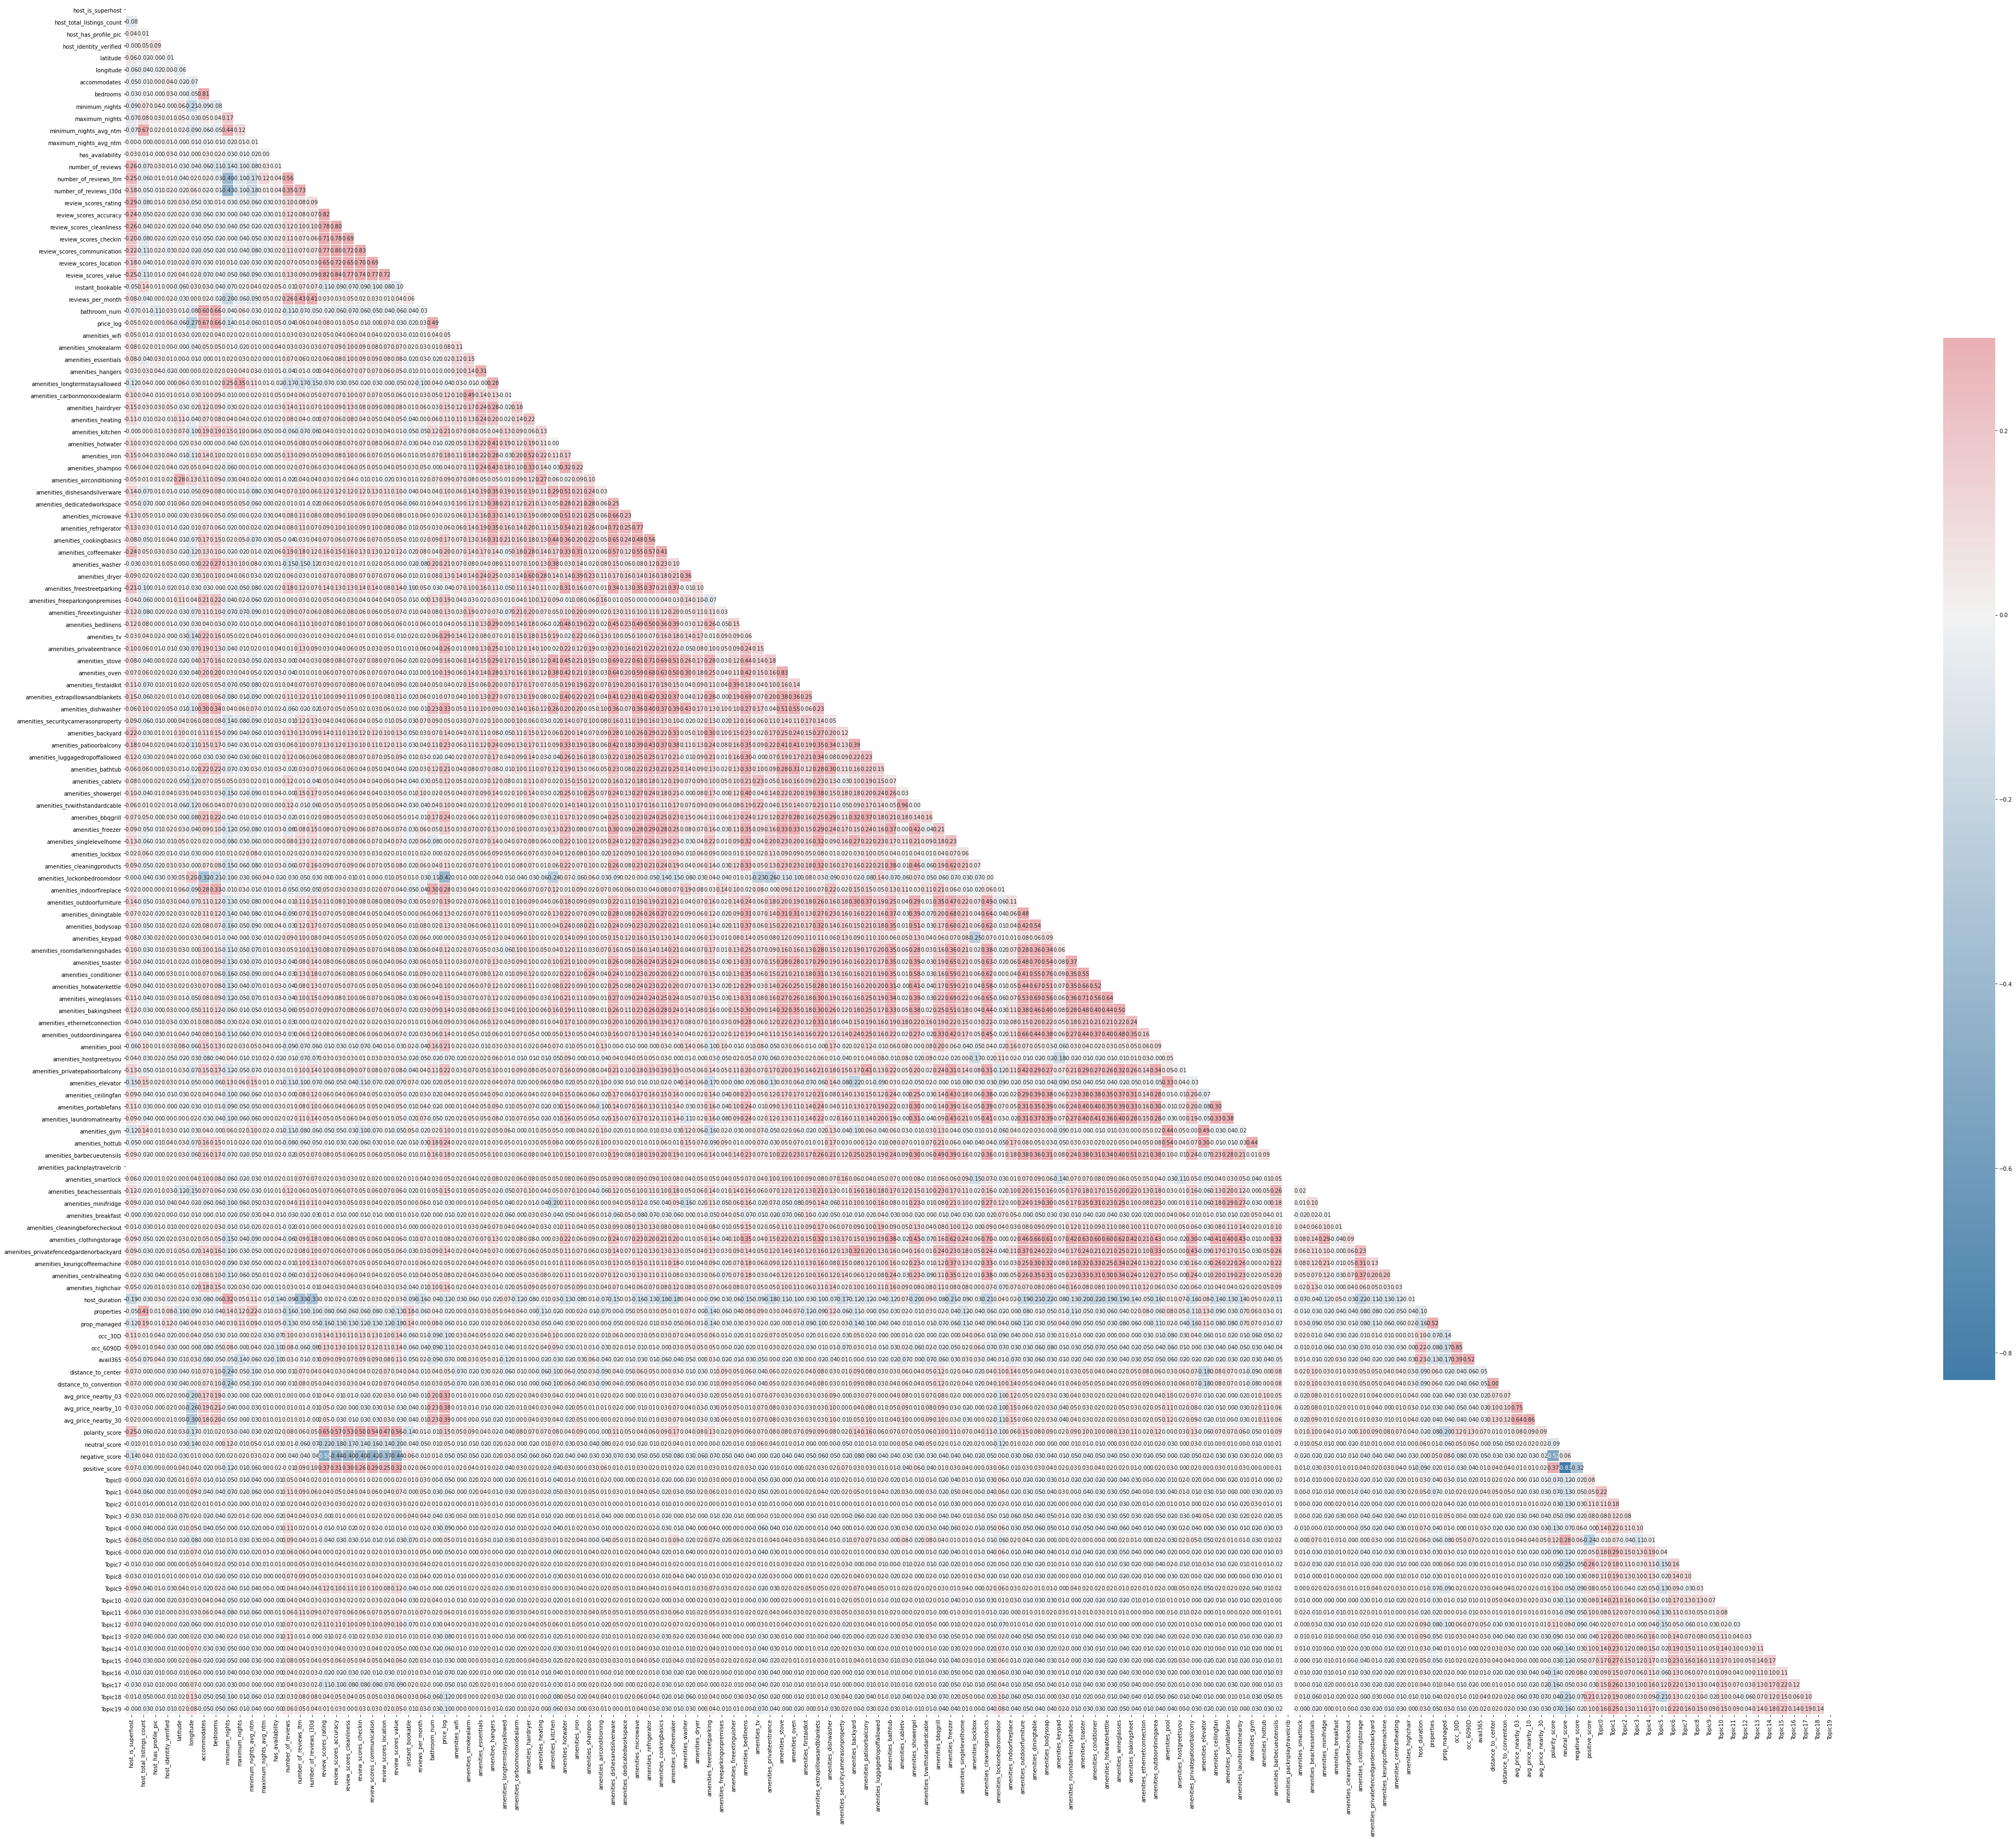

In [ ]:
#Try simple correlation matrix method
#Fig size is huge yet small (can't see numbers properly) because of the huge number of features
#similar to the sample code 2_FS_Filter, extract relevant features
#compute correlation matrix
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

#create subplot
fig, ax = plt.subplots(figsize=(70,70))

cmap = sns.diverging_palette(240,10,as_cmap = True)

#Draw heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(corr["price_log"])
#Selecting highly correlated features
# >0.05 because at baseline, not many features >0.1
relevant_features = cor_target[cor_target>0.05] #try >0.05 
relevant_features


host_is_superhost         0.050741
host_identity_verified    0.058739
latitude                  0.063143
longitude                 0.272518
accommodates              0.673727
                            ...   
Topic14                   0.061454
Topic16                   0.065842
Topic17                   0.052230
Topic18                   0.117770
Topic19                   0.099579
Name: price_log, Length: 91, dtype: float64

In [ ]:
#Extract the relevant features & view top 5
cormat_features = list(relevant_features.index)
cormat_features

['host_is_superhost',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'has_availability',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'bathroom_num',
 'price_log',
 'amenities_smokealarm',
 'amenities_carbonmonoxidealarm',
 'amenities_hairdryer',
 'amenities_heating',
 'amenities_kitchen',
 'amenities_iron',
 'amenities_airconditioning',
 'amenities_dishesandsilverware',
 'amenities_refrigerator',
 'amenities_cookingbasics',
 'amenities_coffeemaker',
 'amenities_washer',
 'amenities_dryer',
 'amenities_freeparkingonpremises',
 'amenities_fireextinguisher',
 'amenities_tv',
 'amenities_privateentrance',
 'amenities_stove',
 'amenities_oven',
 'amenities_extrapillowsandblankets',
 'amenities_dishwasher',
 'amenities_backyard',
 'amenities_patioorbalcony',
 'amenities_bathtub',
 'amenities_cabletv',
 'amenities_showergel',
 'amenities_tvwithst

In [ ]:
len(cormat_features)

91

In [ ]:
#Get df with only selected features
df_cormatrix = df[cormat_features]

In [ ]:
#Run using selected models
y = df_cormatrix['price_log'].to_numpy().reshape(-1,1)
X = df_cormatrix.drop('price_log',axis=1)

import time
start_time = time.time()
# Run Model
print('Length of data: {}'.format(len(df_cormatrix)))
print('')
run_model(X = X, y = y)
print('time taken:',time.time()-start_time)

Length of data: 21625

Train R-sq 0.9713
Train MSE: 0.019

CV R-sq 0.793
CV MSE: 0.1368

time taken: 151.21207690238953


In [ ]:
## get new X,y with all features not just from correlation matrix
X_all = df.drop('price_log', axis=1)
y_all = df['price_log']

### Try SelectKBest Method


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
#use mutual_info_regression; f_regression seems like is correlation matrix 

def featselect_kbest(X,y,k='all'): #default try all 
    random_state = 42
    # Automatic label encoding
    le = LabelEncoder()
    for column_name in X.columns:
        if X[column_name].dtype == object:
            X[column_name] = le.fit_transform(X[column_name])
        else:
            pass
    #Instantiate kbest    
    kbest = SelectKBest(score_func=mutual_info_regression, k=k) #try all features first
    
    #Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    #fit to training
    kbest.fit(X_train,y_train)
    
    #transform train
    X_train_kbest = kbest.transform(X_train)
    
    #transform test 
    X_test_kbest = kbest.transform(X_test)
    
    return X_train_kbest, X_test_kbest, kbest, y_train, y_test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21625 entries, 0 to 21624
Columns: 145 entries, host_is_superhost to Topic19
dtypes: float64(48), int64(94), object(3)
memory usage: 24.1+ MB


In [ ]:
#get the Kbest default value of k=all features
X_train_kbest, X_test_kbest, kbest, y_train_kbest, y_test_kbest = featselect_kbest(X_all,y_all)

In [ ]:
#kbest.scores_

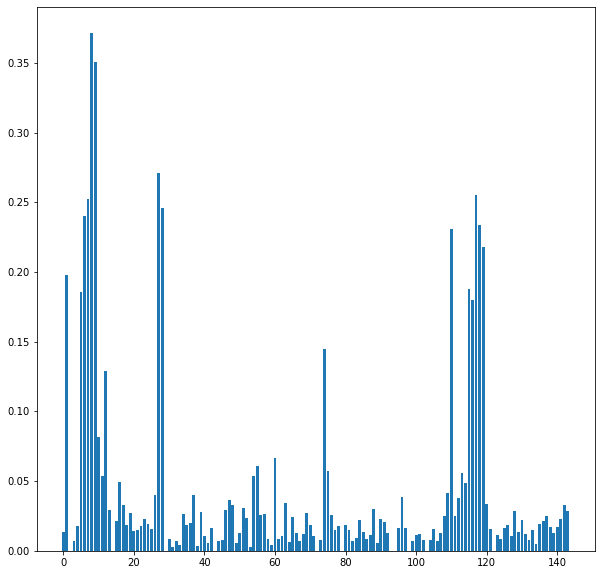

In [ ]:
#Plot the scores

plt.rcParams["figure.figsize"] = (10,10)
plt.bar([i for i in range(len(kbest.scores_))], kbest.scores_)
plt.show()

In [ ]:
##count number of values above 0.05 and set k accordingly
counter = np.where(kbest.scores_ >=0.05,1,0).sum()

#re-run above code with optimal number of values from counter
X_train_k_newbest, X_test_k_newbest, k_newbest, y_train_k_newbest, y_test_k_newbest = featselect_kbest(X_all,y_all,k=counter)

In [ ]:
counter

23

In [ ]:
#find out which columns are selected
#get indices 
k_new_cols = k_newbest.get_support(indices=True)
#get list 
selected_k_new = X_all.iloc[:,k_new_cols].columns.tolist()
selected_k_new


['host_total_listings_count',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'minimum_nights_avg_ntm',
 'number_of_reviews_ltm',
 'bathroom_num',
 'bathroom_sharing',
 'amenities_tv',
 'amenities_privateentrance',
 'amenities_dishwasher',
 'amenities_lockonbedroomdoor',
 'properties',
 'occ_6090D',
 'distance_to_center',
 'distance_to_convention',
 'avg_price_nearby_03',
 'avg_price_nearby_10',
 'avg_price_nearby_30']

In [ ]:
##run model using these best columns
# Train Model
random_state = 42
rf = RandomForestRegressor(n_jobs = -1, random_state = random_state)
    
# Fit Model
rf.fit(X_train_k_newbest, y_train_k_newbest)

# Score model on test set
print('Length of data: {}'.format(len(X_all)))
print('')
regression_scores(rf, X_train = X_train_k_newbest, X_test = X_test_k_newbest, y_train = y_train_k_newbest, y_test = y_test_k_newbest)

Length of data: 21625

Train R-sq 0.9725
Train MSE: 0.0182

CV R-sq 0.8041
CV MSE: 0.1295



### LGBM + SelectFromModel & SelectFromModle (Random Forest)


In [ ]:
## LGBMReressor

from lightgbm import LGBMRegressor
from lightgbm import plot_importance

from numpy import sort
from sklearn.feature_selection import SelectFromModel
#Get a function to generally see feature importance
def run_lgbm(X,y):
    random_state = 42
    
     # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    lgbm = LGBMRegressor(n_jobs=-1,random_state=random_state)
    lgbm.fit(X_train,y_train)
    print('Scores run on full number of features')
    regression_scores(lgbm, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

    # plot feature importance
    # choice of gain, weighted or cover
    # use gain; weighted might give too much bias to numerical or high cardinality. 
    # this post explains it well:
    # https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7
    plot_importance(lgbm, importance_type="gain")
    plt.show()
    
    ## From prof's sample code
    # The following block of codes will try to use importance score for features selection

    start_time = time.time()
    # Fit model using each importance as a threshold
    thresholds = sort(lgbm.feature_importances_) # sort the importance score

    # select feaures by using importance score as threshold
    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(lgbm, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = LGBMRegressor(n_jobs=-1, random_state = 42)
        selection_model.fit(select_X_train, y_train)
        # eval model
        cv_score = cross_validate(selection_model, select_X_train, y_train, scoring=['r2', 'neg_mean_squared_error'], verbose=0, cv = 5)
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        #test_MSE = mean_squared_error(y_train, y_pred)
        #print('CV R-sq', round(np.mean(cv_score['test_r2']),4))
        #print('CV MSE:', round(-np.mean(cv_score['test_neg_mean_squared_error']),4))
        print("Thresh=%.3f, n=%d, CV MSE: %.2f" % (thresh, select_X_train.shape[1], round(-np.mean(cv_score['test_neg_mean_squared_error']),4)))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    return selection

In [ ]:
#View thresholds to identify optimal 
#choices = run_lgbm(X_all,y_all)

In [ ]:
##with Sentiment
#amenities = 30, thresh=18, n_feat=48
#amenities = 40, thresh =15, n_feat=55
#amenities = 50, thresh= 20, n_feat= 43
#amenities = 60, thresh =20  , n_feat=41
#amenities = 70, thresh= 19, n_feat=46
#amenities = 80, thresh =5  , n_feat=89
#amenities = 90, thresh=5, n_feat=91
#amenities = 100, thresh =7 , n_feat=81

##Summary of optimal values
#amenities = 30, thresh=20, n_feat=35
#amenities = 40, thresh =26, n_feat=33
#amenities = 50, thresh=17, n_feat=38
#amenities = 60, thresh = 25 , n_feat=31
#amenities = 70, thresh= 23, n_feat=32
#amenities = 80, thresh = 23 , n_feat=30
#amenities = 90, thresh=4, n_feat=86
#amenities = 100, thresh = 2, n_feat=102

## modify the func to run at threshold = xx
import eli5
from eli5.sklearn import PermutationImportance

## LGBMReressor
from lightgbm import LGBMRegressor
from lightgbm import plot_importance

from numpy import sort
from sklearn.feature_selection import SelectFromModel

#Re-write function to accept threshold value and also output the test MSE on the selected subset
def thresh_run_lgbm(X,y,thresh):
    random_state = 42
    
     # Automatic label encoding
    le = LabelEncoder()
    for column_name in X.columns:
        if X[column_name].dtype == object:
            X[column_name] = le.fit_transform(X[column_name])
        else:
            pass
        
     # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    lgbm = LGBMRegressor(n_jobs=-1,random_state=random_state)
    lgbm.fit(X_train,y_train)
    

    # plot feature importance
    #plot_importance(lgbm, importance_type="gain")
    #plt.show()
    
    ## From prof's sample code
    # The following block of codes will try to use importance score for features selection

    start_time = time.time()
    # Fit model using each importance as a threshold
    thresholds = sort(lgbm.feature_importances_) # sort the importance score

    # select features using threshold
    selection = SelectFromModel(lgbm, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = LGBMRegressor(n_jobs=-1, random_state = 42)
    selection_model.fit(select_X_train, y_train)
    # eval model on cv
    cv_score = cross_validate(selection_model, X_train, y_train, scoring=['r2', 'neg_mean_squared_error'], verbose=0, cv = 5)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
   
   # CV_MSE = mean_squared_error(y_test, cv_score)
    
    print('Score from selected subset of features')
    #Score of subset features (not all features)
    regression_scores(selection_model, X_train = select_X_train, X_test = select_X_test, y_train = y_train, y_test = y_test)
    
    print("Thresh=%.3f, n=%d, CV:%.2f" % (thresh, select_X_train.shape[1],round(-np.mean(cv_score['test_neg_mean_squared_error']),4)))
    
    
    
   
    ##carry on from selection 
    include = selection.get_support()
    headers = X_all.columns

    fs = pd.DataFrame({'cols':headers,'include':include})
    filters = (fs.include==True)
    selected_col = fs[filters].cols.tolist()

    print("--- %s seconds ---" % (time.time() - start_time))
    
    return selected_col

In [ ]:
#New func with optimal threshold value of 5
lgbm_col = thresh_run_lgbm(X_all,y_all,5)

Score from selected subset of features
Train R-sq 0.8891
Train MSE: 0.0733

CV R-sq 0.8349
CV MSE: 0.1091

Thresh=5.000, n=89, CV:0.11
--- 13.070546865463257 seconds ---


In [ ]:
#View chosen columns
lgbm_col

['host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'bathroom_num',
 'bathroom_sharing',
 'amenities_hangers',
 'amenities_longtermstaysallowed',
 'amenities_carbonmonoxidealarm',
 'amenities_hairdryer',
 'amenities_kitchen',
 'amenities_iron',
 'amenities_shampoo',
 'amenities_airconditioning',
 'amenities_dishesandsilverware',
 'amenities_microwave',
 'amenities_refrigerator',
 'amenities_coffeemaker',
 'amenities_washer',
 'amenities_freeparkingonpremises',
 'amenities_fireextinguisher',
 'amenities_tv',
 'amenities_privateentra

### SelectFromModel - RFR

In [ ]:
#n here is the max_features to run in SelectFromModel; will follow whatever n is on LGBM
def run_SFM_rfr(X,y,n):
    random_state = 42
    
    # Automatic label encoding
    le = LabelEncoder()
    for column_name in X.columns:
        if X[column_name].dtype == object:
            X[column_name] = le.fit_transform(X[column_name])
        else:
            pass

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    
    feature_selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state = random_state),
                                       threshold='mean',
                                       max_features=n)

    X_train_ = feature_selector.fit_transform(X_train, y_train)
    X_test = feature_selector.transform(X_test)
    
    print('New shape: ',X_train.shape)
    print('Dropped ', X.shape[1]-X_train.shape[1], ' features')
    
    include=feature_selector.get_support()
    headers=X.columns

    fs=pd.DataFrame({'cols':headers,'include':include})
    filters=(fs.include==True)
    ncols=fs[filters].cols.to_list()

    X_train_sfm = pd.DataFrame(X_train, columns=ncols)
    X_test_sfm =pd.DataFrame(X_test, columns=ncols)

    # Train Model
    rf = RandomForestRegressor(n_jobs = -1, random_state = random_state)
    
    # Fit Model
    rf.fit(X_train_sfm, y_train)

    # Score model on test set
    regression_scores(rf, X_train = X_train_sfm, X_test = X_test_sfm, y_train = y_train, y_test = y_test)
    
    return ncols

In [ ]:
# thresh from LGBM -> 5 -> n = 89
ncols = run_SFM_rfr(X_all,y_all,89)

New shape:  (17300, 144)
Dropped  0  features
Train R-sq 0.9714
Train MSE: 0.0189

CV R-sq 0.7964
CV MSE: 0.1346



In [ ]:

ncols[:5]

['latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms']

In [ ]:
len(ncols)

14